Deep Learning
=============

Assignment 3
------------

Previously in `2_fullyconnected.ipynb`, you trained a logistic regression and a neural network model.

The goal of this assignment is to explore regularization techniques.

In [1]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle

First reload the data we generated in _notmist.ipynb_.

In [7]:
pickle_file = 'notMNIST.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  train_dataset = save['train_dataset']
  train_labels = save['train_labels']
  valid_dataset = save['valid_dataset']
  valid_labels = save['valid_labels']
  test_dataset = save['test_dataset']
  test_labels = save['test_labels']
  del save  # hint to help gc free up memory
  print('Training set', train_dataset.shape, train_labels.shape)
  print('Validation set', valid_dataset.shape, valid_labels.shape)
  print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


Reformat into a shape that's more adapted to the models we're going to train:
- data as a flat matrix,
- labels as float 1-hot encodings.

In [6]:
image_size = 28
num_labels = 10

def reformat(dataset, labels):
  dataset = dataset.reshape((-1, image_size * image_size)).astype(np.float32)
  # Map 2 to [0.0, 1.0, 0.0 ...], 3 to [0.0, 0.0, 1.0 ...]
  labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
  return dataset, labels
train_dataset_1h, train_labels_1h = reformat(train_dataset, train_labels)
valid_dataset_1, valid_labels_1h = reformat(valid_dataset, valid_labels)
test_dataset_1h, test_labels_1h = reformat(test_dataset, test_labels)
print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (200000, 28, 28) (200000,)
Validation set (10000, 28, 28) (10000,)
Test set (10000, 28, 28) (10000,)


In [4]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

---
Problem 1
---------

Introduce and tune L2 regularization for both logistic and neural network models. Remember that L2 amounts to adding a penalty on the norm of the weights to the loss. In TensorFlow, you can compute the L2 loss for a tensor `t` using `nn.l2_loss(t)`. The right amount of regularization should improve your validation / test accuracy.

---

### Logistic Regression and Regularization

In [12]:
# From Assignment 1
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def LR_train(n_samples, C, train_ds, train_lbl, test_ds, test_lbl):

    Xtrain = np.array(train_ds[0:n_samples,:,:])
    Xtrain = np.reshape(Xtrain, (n_samples,784))
    ytrain = np.reshape(train_lbl[0:n_samples], (n_samples,))
    logreg = LogisticRegression(C=C,solver='sag', multi_class='ovr')
    #gauss_wgts = np.random.normal(loc=0, scale=0.2, size=n_samples)
    logreg.fit(Xtrain, ytrain)
    
    testX = np.reshape(test_ds, (len(test_ds), 784))
    ypred = logreg.predict(testX)
    
    yresp = np.reshape(test_lbl, (len(test_lbl,)))
    
    return metrics.accuracy_score(yresp, ypred)   

In [38]:
print(LR_train(1000, .09, train_dataset, train_labels, test_dataset, test_labels))

0.854


In [59]:
accuracy_scores = []
for c_val in np.arange(0.001, 1.0, .005):
    #print(c_val)    
    acc = LR_train(1000, c_val, train_dataset, train_labels, test_dataset, test_labels)
    accuracy_scores.append(acc)


0.001
0.006
0.011
0.016
0.021
0.026
0.031
0.036
0.041
0.046
0.051
0.056
0.061
0.066
0.071
0.076
0.081
0.086
0.091
0.096
0.101
0.106
0.111
0.116
0.121
0.126
0.131
0.136
0.141
0.146
0.151
0.156
0.161
0.166
0.171
0.176
0.181
0.186
0.191
0.196
0.201
0.206
0.211
0.216
0.221
0.226
0.231
0.236
0.241
0.246
0.251
0.256
0.261
0.266
0.271
0.276
0.281
0.286
0.291
0.296
0.301
0.306
0.311
0.316
0.321
0.326
0.331
0.336
0.341
0.346
0.351
0.356
0.361
0.366
0.371
0.376
0.381
0.386
0.391
0.396
0.401
0.406
0.411
0.416
0.421
0.426
0.431
0.436
0.441
0.446
0.451
0.456
0.461
0.466
0.471
0.476
0.481
0.486
0.491
0.496
0.501
0.506
0.511
0.516
0.521
0.526
0.531
0.536
0.541
0.546
0.551
0.556
0.561
0.566
0.571
0.576
0.581
0.586
0.591
0.596
0.601
0.606
0.611
0.616
0.621
0.626
0.631
0.636
0.641
0.646
0.651
0.656
0.661
0.666
0.671
0.676
0.681
0.686
0.691
0.696
0.701
0.706
0.711
0.716
0.721
0.726
0.731
0.736
0.741
0.746
0.751
0.756
0.761
0.766
0.771
0.776
0.781
0.786
0.791
0.796
0.801
0.806
0.811
0.816
0.821
0.826
0.83

In [69]:
print('max accuracy', max(accuracy_scores))
print('index',accuracy_scores.index(max(accuracy_scores)))
print(np.arange(.001,1.0,.005)[0:8])
print(accuracy_scores[0:8])

max accuracy 0.8599
index 5
[ 0.001  0.006  0.011  0.016  0.021  0.026  0.031  0.036]
[0.82550000000000001, 0.85219999999999996, 0.85709999999999997, 0.85880000000000001, 0.85970000000000002, 0.8599, 0.85950000000000004, 0.85860000000000003]


In [75]:
accuracy_scores_1 = []
for c_val in np.arange(0.022, .031, .0001):
    #print(c_val)    
    acc = LR_train(1000, c_val, train_dataset, train_labels, test_dataset, test_labels)
    accuracy_scores_1.append(acc)

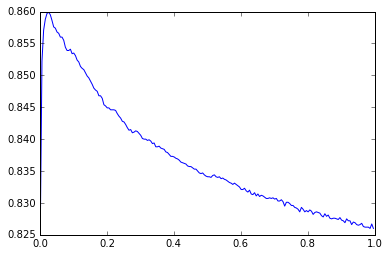

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(.001, 1.0, .005), accuracy_scores)

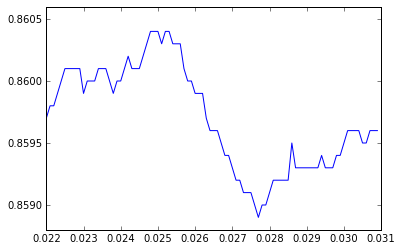

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(.022, .031, .0001), accuracy_scores_1)

In [78]:
print('max accuracy', max(accuracy_scores_1))
print('index',accuracy_scores_1.index(max(accuracy_scores_1)))
print(np.arange(.022,.031,.0001)[20:30])
print(accuracy_scores_1[20:30])

max accuracy 0.8604
index 28
[ 0.024   0.0241  0.0242  0.0243  0.0244  0.0245  0.0246  0.0247  0.0248
  0.0249]
[0.85999999999999999, 0.86009999999999998, 0.86019999999999996, 0.86009999999999998, 0.86009999999999998, 0.86009999999999998, 0.86019999999999996, 0.86029999999999995, 0.86040000000000005, 0.86040000000000005]


### NN Training and Regularization

In [79]:
graphn = tf.Graph()

with graphn.as_default():
    # Inputs and PLACEHOLDERS
    # Originally set the shape for each of these to specifically use batch_size for # rows
    # This caused problems when I wanted to run the entire test set to get an accuracy score
    # because batch_size was 128 and the test set dimension was much larger (10000, 784)
    # then I saw that the tutorial used None instead and that worked for everything
    images_placeholder     =tf.placeholder(tf.float32, shape=(None, IMAGE_PIXELS))
    labels_placeholder     =tf.placeholder(tf.float32, shape=(None, NUM_CLASSES))
    labels_placeholder_int =tf.placeholder(tf.int32, shape=(None))  
   
    # INFERENCE
    with tf.name_scope('hidden1') as scope:
        weights = tf.Variable(tf.truncated_normal([IMAGE_PIXELS, hidden1_units], 
            stddev=1.0 / math.sqrt(float(IMAGE_PIXELS))), name='weights')
        biases = tf.Variable(tf.zeros([hidden1_units]), name = 'biases')
        hidden1 = tf.nn.relu(tf.matmul(images_placeholder, weights) + biases)

    with tf.name_scope('hidden2') as scope:
        weights = tf.Variable(tf.truncated_normal([hidden1_units, hidden2_units],
            stddev=1.0 / math.sqrt(float(hidden1_units))), name='weights')
        biases = tf.Variable(tf.zeros([hidden2_units]), name='biases')
        hidden2 = tf.nn.relu(tf.matmul(hidden1, weights) + biases)

    with tf.name_scope('softmax_linear') as scope:
        weights = tf.Variable(tf.truncated_normal([hidden2_units, NUM_CLASSES],
            stddev=1.0 / math.sqrt(float(hidden2_units))),name='weights')
        biases = tf.Variable(tf.zeros([NUM_CLASSES]),name='biases')
        logits = tf.matmul(hidden2, weights) + biases
      
    # LOSS
    # softmax_cross_entropy needs labels_placeholder to be float32 1hot encoded
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, labels_placeholder))
    
    # TRAINING
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    global_step = tf.Variable(0, name='global_step', trainable=False)
    train_op = optimizer.minimize(loss, global_step=global_step)
    train_prediction = tf.nn.softmax(logits)
    
    # EVAL (use either eval_acc op or the eval_correct op)
    # Gets the index of the largest value across the tensor, test_a is prediction, test_b is response
    test_a = tf.argmax(logits,1)
    test_b = tf.argmax(labels_placeholder,1)
    # Boolean tensor
    correct_prediction = tf.equal(test_a, test_b)
    cast_float = tf.cast(correct_prediction, tf.float32)
    # Get mean across tensor, ie sum/length
    eval_acc = tf.reduce_mean(cast_float)
    # in_top_k requires labels_placeholder to be int32 or int64 list
    correct = tf.nn.in_top_k(logits, labels_placeholder_int, 1)
    eval_correct = tf.reduce_sum(tf.cast(correct, tf.int32))

NameError: name 'IMAGE_PIXELS' is not defined

In [ ]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

In [ ]:
# TRAINING LOOP

with tf.Session(graph=graphn) as session:
    init = tf.initialize_all_variables().run()
    sess = tf.Session()
    
    for step in xrange(max_steps):
        # Generates the starting index from train_dataset to extract the minibatch
        offset = (step * batch_size) % (train_labels.shape[0] - batch_size)
        batch_data = train_dataset[offset:(offset + batch_size), :]
        batch_labels = train_labels[offset:(offset + batch_size), :]
        batch_labels_int = train_labels_int[offset:(offset + batch_size)]
        # A) The fact that I only feed it labels_placeholder and not labels_placeholder_int?
        feed_dict = {images_placeholder : batch_data, labels_placeholder : batch_labels, labels_placeholder_int : batch_labels_int}
        _, l, predictions, num_correct = session.run([train_op, loss, train_prediction, eval_correct], feed_dict=feed_dict)       
        
        if (step % 500 == 0):
            print("Minibatch loss at step %d: %f" % (step, l))
            print("Minibatch accuracy: %.1f%%" % accuracy(predictions, batch_labels))
            # Evaluate the entire dataset in specified batch-size increments, return all predictions
            acc, eval_predictions = do_eval(valid_dataset, valid_labels, valid_labels_int, batch_size, 
                    images_placeholder, labels_placeholder, labels_placeholder_int)
            print("Validation accuracy: %4.6f" %(acc))
    
    fdict = {images_placeholder : test_dataset, 
             labels_placeholder : test_labels,
             labels_placeholder_int : test_labels_int}
    logits, eval_correct, test_acc = session.run([logits, eval_correct, eval_acc], feed_dict=fdict)
    print('Test dataset accuracy %4.2f%%' %(100*eval_correct/float(len(test_dataset))))
    
    #print(sess.run(logits, feed_dict={images_placeholder: test_dataset,labels_placeholder: test_labels}))
            

In [ ]:
def do_eval(valid_dataset, valid_labels, valid_labels_int, batch_size, 
            images_placeholder, labels_placeholder, labels_placeholder_int):
    true_count = 0  # Counts the number of correct predictions.
    steps_per_epoch = valid_dataset.shape[0] // batch_size
    num_examples = steps_per_epoch * batch_size
    eval_predictions = []
    for step in xrange(steps_per_epoch):
        eval_offset = (step * batch_size) % (valid_labels.shape[0] - batch_size)
        eval_batch_data = valid_dataset[eval_offset:(eval_offset + batch_size), :]
        eval_batch_labels = valid_labels[eval_offset:(eval_offset + batch_size), :]
        eval_batch_labels_int = valid_labels_int[eval_offset:(eval_offset + batch_size)]
        f_dict = {images_placeholder : eval_batch_data, labels_placeholder : eval_batch_labels,
                  labels_placeholder_int : eval_batch_labels_int}
        eval_predictions += session.run([eval_correct, loss, train_op], feed_dict=f_dict)
    #print("validation accuracy: %4.6f%%" %(100*sum(eval_predictions)/float(num_examples)))    
    return 100*sum(eval_predictions)/float(num_examples), eval_predictions

---
Problem 2
---------
Let's demonstrate an extreme case of overfitting. Restrict your training data to just a few batches. What happens?

---

---
Problem 3
---------
Introduce Dropout on the hidden layer of the neural network. Remember: Dropout should only be introduced during training, not evaluation, otherwise your evaluation results would be stochastic as well. TensorFlow provides `nn.dropout()` for that, but you have to make sure it's only inserted during training.

What happens to our extreme overfitting case?

---

---
Problem 4
---------

Try to get the best performance you can using a multi-layer model! The best reported test accuracy using a deep network is [97.1%](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html?showComment=1391023266211#c8758720086795711595).

One avenue you can explore is to add multiple layers.

Another one is to use learning rate decay:

    global_step = tf.Variable(0)  # count the number of steps taken.
    learning_rate = tf.train.exponential_decay(0.5, global_step, ...)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
 
 ---
